In [ ]:
import numpy as np
import pandas as pd

# Customer Churn Prediction using Neural Networks

## Overview

This notebook demonstrates how to build a neural network to predict customer churn using a bank customer dataset. We'll use TensorFlow/Keras to create a deep learning model that predicts whether a customer will leave the bank.

## Workflow

1. Load and explore the data
2. Data preprocessing and feature engineering
3. Data standardization
4. Build a neural network model
5. Train the model
6. Evaluate performance
7. Analyze results

## Import Required Libraries

We start by importing NumPy for numerical operations and Pandas for data manipulation.


In [4]:
df = pd.read_csv("./Churn_Modelling.csv")

## 1. Load the Dataset

We load the customer churn dataset from a CSV file. This dataset contains information about bank customers including their demographics, account information, and whether they exited (churned).


In [6]:
df.shape

(10000, 14)

## 2. Explore Dataset Shape and Structure

Check the dimensions of the dataset to understand how many samples (rows) and features (columns) we're working with.


In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3. View First Few Rows

Display the first few rows of the dataset to get a sense of the data, column names, and their values.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## 4. Data Types and Missing Values

Inspect the data types of each column and check for any missing values that might need handling.


In [11]:
df.duplicated().sum()

0

## 5. Check for Duplicates

Verify if there are any duplicate rows in the dataset that might skew our analysis or model training.


In [12]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

## 6. Target Variable Distribution

Examine the distribution of the target variable (Exited). This shows the class balance - how many customers churned vs. stayed. Class imbalance can affect model performance.


In [13]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

## 7. Data Cleaning - Remove Non-Predictive Columns

Remove columns that don't contain useful predictive information:

- **RowNumber**: Just an index, not a feature
- **CustomerId**: Customer ID doesn't help predict churn
- **Surname**: Name data is not relevant for predictions

These columns should be dropped to avoid noise in the model.


In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 8. Verify Cleaned Data

View the first few rows after cleaning to confirm the unwanted columns have been removed.


In [16]:
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)

## 9. Encode Categorical Variables

Convert categorical variables (Geography and Gender) into numerical format using one-hot encoding:

- **One-hot encoding** creates binary columns for each category
- **drop_first=True** prevents multicollinearity by dropping the first category of each feature
- This converts text data into a format that neural networks can process


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 10. Import Preprocessing Tools

Import tools for splitting data and scaling features:

- **train_test_split**: Divides data into training and testing sets
- **StandardScaler**: Normalizes features to have mean=0 and std=1, which helps neural networks train faster and more effectively


In [18]:
X = df.drop(columns=["Exited"])
y = df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## 11. Split Data into Training and Testing Sets

Separate the data:

- **X**: Feature matrix (independent variables)
- **y**: Target vector (Exited - the variable we're predicting)
- **test_size=0.2**: Use 80% for training, 20% for testing
- **random_state=1**: Ensures reproducibility by fixing the random split


In [22]:
scaler = StandardScaler()

X_trained_scale = scaler.fit_transform(X_train)
X_tested_scale = scaler.fit_transform(X_test)

## 12. Standardize Features Using StandardScaler

Normalize the features to have zero mean and unit variance:

- **fit_transform**: Learn scaling parameters from training data and apply transformation
- **fit_transform** (on test): Apply the same transformation to test data
- This ensures all features are on the same scale, preventing features with larger values from dominating the learning process


In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense

## 13. Import Neural Network Components

Import Keras/TensorFlow components to build a deep learning model:

- **Sequential**: Linear stack of neural network layers
- **Input**: Defines the shape of input data
- **Dense**: Fully connected layer where each neuron connects to all neurons in previous layer


In [43]:
model = Sequential()

model = Sequential()
model.add(Input(shape=(11,)))
model.add(Dense(11, activation="relu"))
model.add(Dense(11, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

## 14. Build Neural Network Architecture

Create a feedforward neural network with the following structure:

- **Input Layer**: Accepts 11 features
- **Hidden Layer 1**: 11 neurons with ReLU activation
  - ReLU (Rectified Linear Unit) introduces non-linearity
- **Hidden Layer 2**: 11 neurons with ReLU activation
  - Second hidden layer adds model capacity
- **Output Layer**: 1 neuron with sigmoid activation
  - Sigmoid outputs probability between 0 and 1 (suitable for binary classification)


In [44]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

## 15. Display Model Architecture

Print a summary of the model showing:

- Layer types and output shapes
- Number of parameters in each layer
- Total trainable parameters


In [54]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

## 16. Compile the Model

Prepare the model for training by specifying:

- **loss="binary_crossentropy"**: Appropriate loss function for binary classification
  - Measures the difference between predicted probabilities and actual labels
- **optimizer="Adam"**: Adaptive learning rate optimization algorithm
  - Adjusts learning rates individually for each parameter
- **metrics=["accuracy"]**: Track accuracy during training and evaluation


In [70]:
history = model.fit(X_trained_scale, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8670 - loss: 0.3130 - val_accuracy: 0.8594 - val_loss: 0.3297
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8588 - loss: 0.3302 - val_accuracy: 0.8600 - val_loss: 0.3273
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8625 - loss: 0.3243 - val_accuracy: 0.8594 - val_loss: 0.3289
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8771 - loss: 0.3039 - val_accuracy: 0.8612 - val_loss: 0.3276
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8707 - loss: 0.3141 - val_accuracy: 0.8606 - val_loss: 0.3277
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8698 - loss: 0.3093 - val_accuracy: 0.8594 - val_loss: 0.3295
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8610 - loss: 0.3265 - val_accuracy: 0.8594 - val_loss: 0.3280
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8684 - loss: 0.3163 - val_accu

## 17. Train the Model

Train the neural network on the training data:

- **epochs=100**: Number of complete passes through the training data
- **validation_split=0.2**: Use 20% of training data for validation during training
- The model learns to minimize the loss function by adjusting weights through backpropagation
- Training history is saved to analyze learning curves


In [71]:
model.layers[0].get_weights()

[array([[ 0.16758464, -0.30520836,  0.02223441,  0.16178429,  0.2992858 ,
         -0.22764243,  0.03115961, -0.1391726 , -0.01576798,  0.48032022,
          0.29604623],
        [ 0.40256798, -0.11549386, -0.24238981,  0.17677918, -0.09516871,
          1.735161  , -0.5599594 ,  0.6523232 ,  0.06861388,  0.26943454,
          1.0018793 ],
        [-0.16756216, -0.04101333, -0.3577026 , -0.11485076, -0.30640963,
         -0.13280211,  0.06027656,  0.02519128,  0.22262539, -0.32963523,
          0.47516   ],
        [ 0.32486066,  0.7687031 ,  0.90203214, -0.18168771, -0.01266219,
          0.28746226, -1.1236732 , -0.57061654, -0.8094394 , -0.7303386 ,
         -0.38632053],
        [ 0.9214844 , -0.51768136, -0.4206774 ,  1.5324614 , -0.08868434,
          0.7472886 , -0.5425821 , -1.1185436 , -0.5329264 ,  0.49727234,
         -0.78403974],
        [-0.26122844,  0.06345067, -0.25119445,  0.21551217, -0.555338  ,
         -0.04365672,  0.03904382,  0.04510858, -0.04955718, -0.6390928

## 18. Inspect First Hidden Layer Weights

Extract and examine the weights and biases from the first hidden layer:

- Shows how the input features are weighted
- First element is the bias term
- Remaining elements are weights for each input feature


In [72]:
model.layers[1].get_weights()

[array([[ 0.2995014 ,  0.8485512 , -0.30320796, -0.27303883,  0.28619698,
          0.64495015, -0.03722536,  0.43772745,  0.1353622 ,  0.11621898,
          0.8949763 ],
        [ 0.16896893,  0.14930919,  0.4969589 ,  0.37804383, -0.37997708,
         -0.00735088,  0.5592228 ,  0.46337795,  0.15330538,  0.77187526,
          0.7095843 ],
        [-0.08176704,  0.34937203,  0.11913322,  0.06944487,  0.19522835,
         -1.2393452 ,  0.458903  , -0.35324234, -0.14164206,  0.451621  ,
         -0.53467625],
        [ 0.12055225, -1.059476  ,  0.22643848,  0.44461468,  0.36181086,
          0.62559634, -0.02249202,  0.68763727, -0.18995164, -1.2582763 ,
          0.8112026 ],
        [-0.30160403,  0.06614657, -1.3829436 ,  0.50581324, -1.1002288 ,
         -0.23447075, -0.27244806,  0.18791135, -0.11140814, -0.7803449 ,
          0.4108312 ],
        [ 0.6728509 , -0.2962967 ,  0.67509997, -0.5569446 ,  0.40525433,
          0.45212492, -0.88029295, -1.4910263 , -4.068785  ,  0.2269475

## 19. Inspect Second Hidden Layer Weights

Extract and examine the weights and biases from the second hidden layer:

- Shows how the first hidden layer outputs are combined
- Weights learned by the network for the second layer


In [73]:
y_log = model.predict(X_tested_scale)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step


## 20. Make Predictions on Test Data

Generate predictions using the trained model:

- Returns probability scores between 0 and 1
- High values (~1) indicate predicted churn
- Low values (~0) indicate predicted no-churn


In [74]:
y_pred = np.where(y_log > 0.5, 1, 0)

## 21. Convert Probabilities to Binary Predictions

Convert continuous probability outputs to discrete class predictions:

- **threshold = 0.5**: Standard threshold for binary classification
- Predictions >= 0.5 become 1 (churn)
- Predictions < 0.5 become 0 (no churn)


In [77]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## 22. Import Evaluation and Visualization Tools

Import libraries for:

- **accuracy_score**: Calculate the fraction of correct predictions
- **matplotlib**: Create visualization plots to analyze model performance


In [78]:
accuracy_score(y_test, y_pred)

0.863

## 23. Calculate Model Accuracy

Evaluate the model performance on the test set:

- Compares predicted labels with actual labels
- Accuracy = (correct predictions) / (total predictions)
- Value between 0 and 1 (or 0-100%)


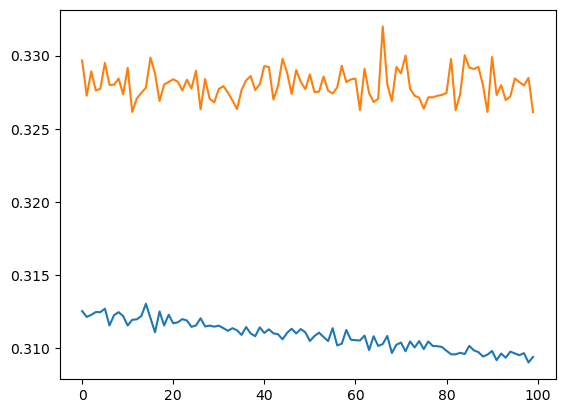

In [80]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

## 24. Plot Training Loss

Visualize how the loss decreases during training:

- **Blue line**: Training loss on the training set
- **Orange line**: Validation loss on the validation set
- Decreasing loss indicates the model is learning
- Divergence between lines may indicate overfitting (model memorizing training data)


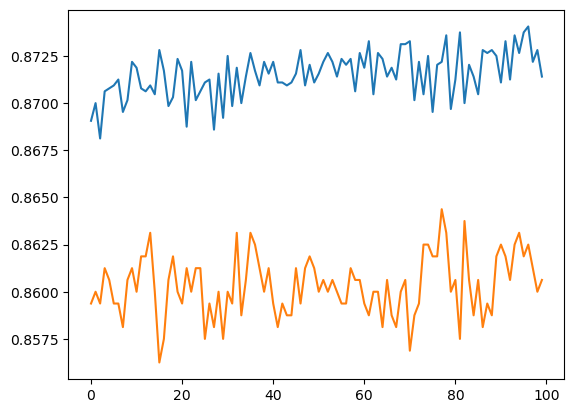

In [81]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

## 25. Plot Training Accuracy

Visualize how accuracy improves during training:

- **Blue line**: Training accuracy on the training set
- **Orange line**: Validation accuracy on the validation set
- Increasing accuracy shows the model is learning
- Both lines should improve together for good generalization
